# Climatological Lagrangian Coherent Structure

Objective: Having climatological fields calculate the cLCSs for a region. 
Climatological LCS based on the code developed by Rodrigo Duran for [Matlab](https://bitbucket.org/rodu/clcss/src/master/)

Dec - 2023 Mireya M. Montano mireya.mmor@gmail.com

## Extracting Data

As part of the Moana Project the data for the Bay of Plenty (region of study) is available through [THREDDS](http://thredds.moanaproject.org:6443/thredds/catalog/moana/catalog.html) server. Therefore, we can just call the desired file providing the link.

In [2]:
import os

THREDDS_SERVER = "http://thredds.moanaproject.org:6443/thredds/dodsC/moana/"
BOP_CLIMA_PATH = f"BoP_1km/climatology_sigma/BoP_climatology_"

PATH = os.path.join(THREDDS_SERVER, BOP_CLIMA_PATH)

### Parameters needed
#### File/environment related parameters

In [3]:
month = 1
m = "%02d" % int(month)
climatology_file = f"{PATH}{m}.nc"
dirr = os.getcwd()

#### Particle release and OpenDrift configuration parameters

In [4]:
T = -7
dt = 6
time_step_output = 86400
frequency_of_deployments = 1
z = 0

# OpenDrift configuration parameters
opendrift_reader = "reader_ROMS_native_MOANA"
opendrift_model = "OceanDrift"
log_level = 40  # 50 For no logging information, 20 For a certain amount, 0 for all the debugging
vars_dict = {"mask": "mask_rho", "lon": "lon_rho", "lat": "lat_rho"}
max_speed = 5
horizontal_diffusivity = 0.1
advection_scheme = "runge-kutta4"

#### OpenDrift releases and calculation of the Cauchy-Green Tensors.

This class returns a file containing the accumulated values associated with the calculation of the Cauchy-Green Tensors for each run of the chosen month. It can also return a file containing the calculated particle trajectories and the daily Cauchy-Green Tensor estimates,     save_trajectories=True and save_daily_CG=True respectively. 

*Note Each particle release takes about a minute. This is a 315x400 grid. Therefore the calculation for each month varies between 25 to 30 minutes. However once it is run and the TOT-%m.p pickle file is saved there is no need to re-run the particle simulation.  

In [3]:
from cLCS.mean_C import mean_CG

CG = mean_CG(
    dirr,
    climatology_file,
    month,
    T,
    dt,
    frequency_of_deployments,
    time_step_output,
    z,
    opendrift_reader,
    opendrift_model,
    log_level,
    vars_dict,
    max_speed,
    horizontal_diffusivity,
    advection_scheme,
    save_trajectories=False,
    save_daily_CG=False,
)

CG.run()

In [8]:
from cLCS.make_cLCS import compute_cLCS_squeezelines

squeezelines = compute_cLCS_squeezelines(f"{dirr}/", month, arclength=300)

In [9]:
squeezelines.run()

INFO:root:Plotting line 0 from 590
INFO:root:Plotting line 4 from 590
INFO:root:Plotting line 8 from 590


KeyboardInterrupt: 

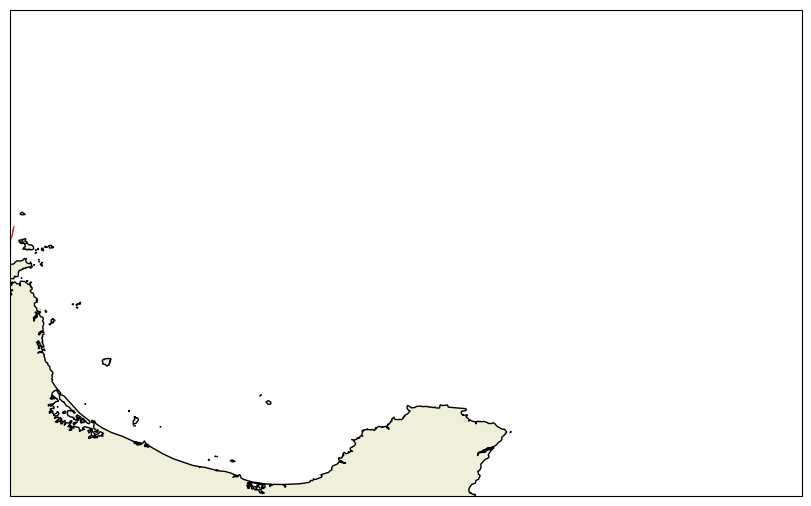

In [5]:
from cLCS.plotting_cLCS import *

fig = cLCSrho_cartopy(
    dirr,
    month,
    colourmap="Zissou",
    fig=None,
    ax=None,
    projection=ccrs.PlateCarree(central_longitude=180),
    line_spacing=2,
)